# Hopfield Networks and Boltzmann Machines:

## Hopfield Networks:
Hopfield networks, introduced in 1982 by J.J Hopfield, are pretty useless. Other neural network models have achieved better performance compared to hopfield networks. It's usefulness revolves around the fact that it presented a new perspective on learning systems, different to the current state of deep learning, giving rise to *Boltzmann machines*, which are built on top of Hopfield network's ideas.

A Hopfield network is a *recurrent* neural network model that can be given corrupt and noisy data and reconstruct the original image. 

### Content Addressable Memory or Auto-Associative Memory:

Hopfield networks are inspired by the ability of humans to retrieve something from memory, given a small part of the data as a prompt.

Eg. "to be or not to be, ..."

### Energy Based Models:

<table>
    <tr>
        <td>            
            <img src="images/energy-function-noisy-images.png" width="100%">
            <p style="text-align: center;">Restoring noisy or corrupted images</p>
        </td>
        <td>
            <img src="images/energy-function-for-images.png" width="100%">
        </td>
    <tr>
</table>


Define an *energy function* on the set of images that maps states to an energy value, such that the energy value is very low for those original images. If we start with a corrupted or noisy image and make small changes to the image, we descend the *basin of attraction*.

Consider the set of images, all composed of $d$ pixels each, where every pixel is either white or black, so we say $x_j=-1$ if pixel $j$ is black and $x_j=1$ if pixel $j$ is white, for all $1\leq j\leq d$.

We can define an energy function:

$$
    E(x) = - \big( \underbrace{\frac{1}{2} \sum_{i, j} x_i w_{ij} x_j}_{\text{Consider pixel pairs } x_i, x_j} + \underbrace{\sum_{i} b_i x_i}_{\text{Effect of pixel }x_i \text{ on energy}} \big). \tag{1}
$$

If $x_i$ and $x_j$ are the same colour, we subtract $w_{ij}$. If they are opposite, we add $w_{ij}$.

$w_{ij}$ 'measures' the correlation between pixels $i$ and $j$. If two pixels $x_i$ and $x_j$ tend to have the same colour, then $w_{ij}$ would be positive. If two pixels $x_i$ and $x_j$ tend to differ, then $w_{ij}$ would be negative.

- If $w_{ij}$ is positive, that means images for which the pixel colours $x_i$ and $x_j$ are the same will have a lower energy value &mdash; since $w_{ij}$ would be subtracted in $(1)$, therefore resulting in a lower total energy value $E(x)$.
- If $w_{ij}$ is negative, then images for which the pixel colours $x_i$ and $x_j$ are different will result in $w_{ij}$ being subtracted from the total energy value $E(x)$.

### Hopfield Network:

Suppose we have a *state space* where each particular state in that state space is a vector of pixel colours, $x=\{x_j\}_{1 \leq j \leq d}$, where either $x_j=1$ or $x_j=-1$. We can define an energy function as:
$$
    E(x) = - \big( \frac{1}{2} \sum_{i, j} x_i w_{ij} x_j + \sum_{i} b_i x_i \big). \tag{same as 1}
$$

- We assume $w_{ii}=0$ for all $i$ since there is no connection between a node and itself

and $w_{ij} = w_{ji}$ for all pixel pairs.
- This energy function's variables, $w, b, x$, correspond to the weight, bias and inputs of a neural network
    - The input layer components $x_{i}$ must strictly be either $1$ or $-1$ 

#### Initialising The Weight Matrix:
Suppose we want to store $p$ state vectors, $\{x^{(k)}\}_{i \leq k \leq p}$ into a network with an input layer of $d$ nodes. We can set the bias to 0, $b=0$ and we can initialise the weights to be:

$$
    w_{ij} = \frac{1}{d} \sum_{k=1}^p x_i^{(k)} x_{j}^{(k)}. \tag{2}
$$


The above equation looks at every state vector $x^{k}$ for $1\leq k \leq p$ and initialises $w_{ij}$ to be the sum of the product $x_i^{(k)} \cdot x_j^{(k)}$, which is always either $1$ or $-1$, then divides it by the size of the input, $d$.

Equivalently to $(2)$, we have the equation:
$$
    w_{ij} = \frac{(-1 + 2c)p}{d}, 
$$

where $c$ is the fraction of the total $p$ inputs for which $x_i^{(k)} = x_j^{(k)}$. We have the scaling and offset $-1 + 2c$ so that we can bring the range from $[0, 1]$ to $[-1, 1]$.

If two pixels $x_i$ and $x_j$ are the same more often than not, in all of the $p$ images, then $w_{ij}$ will be positive. 

<table>
    <tr>
        <td width="25%">          
            <p style="text-align: center;">A hopfield network with 4 nodes/pixels</p>
            <img src="images/hopfield-network.png" width="100%">
        </td>
        <td>
            <p style="text-align: center;">The input state vector (image) and its weight matrix</p>
            <img src="images/hopfield-state-and-weight.png" width="100%">
        </td>
        <td>
            <p style="text-align: center;">A weight matrix, initialised according to equation $(2)$</p>
            <img src="images/hopfield-weight-matrix-initialised.png" width="100%">
        </td>
    <tr>
</table>

#### Neuron Update Rule:
Suppose we're given a corrupted input vector $\{x_i\}_{1 \leq i \leq d}$.

For the Hopfield network to restore this corrupted image, we are going to consider the pixels one at a time and ask "if we flip this pixel's value, and leave the rest of the image unchanged, does the energy function value decrease?". This gives us the update rule:


$$ x_i :=  \left\{
\begin{array}{ll}
      1   & \text{if } \sum_{j} w_{ij}x_j > 0 \\
      x_i & \text{if } \sum_{j} w_{ij}x_j == 0 \\ \tag{3}
      -1  & \text{if } \sum_{j} w_{ij}x_j < 0  \\
\end{array} 
\right. $$ 

With this update rule, eventually the corrupted image will decrease in its energy function value $E(x)$ towards a local minimum &mdash; descending the *basin of attraction*. With this, we are changing the input and converging towards the stablest configuration of the image, called the *stable attractor*. What the input vector eventually becomes is what it believes to be the restored image. It's possible for this to fail where if the pixel vector converges to the wrong local minimum, the restored result will be incorrect.

##### Example Restoration:

<table>
    <tr>
        <td>            
            <img src="images/hopfield-network-corrupted.png" width="100%">
        </td>
        <td width="80%">
            <p style="text-align: center;">The input vector is $x=[1, -1, -1, -1]$. We're expecting the restored vector to be $[1, -1, -1, 1]$ by following $(3)$</p>
            <p style="text-align: left;">
                $x_1 := 1$ since $\sum_j w_{1,j}x_j = w_{1,1}x_1 + w_{1,2}x_2 + w_{1,3}x_3 + w_{1,4}x_4 = (0)(1) + (-1)(-1) + (-1)(-1) + (1)(-1) > 0$
            </p>
            <p style="text-align: left;">
                $x_2 := -1$ since $\sum_j w_{2,j}x_j = w_{2,1}x_1 + w_{2,2}x_2 + w_{2,3}x_3 + w_{2,4}x_4 = (-1)(1) + (0)(-1) + (1)(-1) + (-1)(-1) < 0$
            </p>
            <p style="text-align: left;">
                $x_3 := -1$ since $\sum_j w_{3,j}x_j = w_{3,1}x_1 + w_{3,2}x_2 + w_{3,3}x_3 + w_{3,4}x_4 = (-1)(1) + (1)(-1) + (0)(-1) + (-1)(-1) < 0$
            </p>
            <p style="text-align: left;">
                $x_4 := 1$ since $\sum_j w_{4,j}x_j = w_{4,1}x_1 + w_{4,2}x_2 + w_{4,3}x_3 + w_{4,4}x_4 = (1)(1) + (-1)(-1) + (-1)(-1) + (0)(-1) < 0$
            </p>
            <p style="text-align: center;">Now the resultant vector is $[1, -1, -1, 1]$, the expected restoration</p>
        </td>
    <tr>
</table>


####  Crosstalk:
For the weighted sum
$$
    \sum_{j=1}^d w_{ij}x_j^{(l)}, 
$$

we can take equation $(2)$ and substitute it in to get
$$
    \begin{align}
    \sum_{j=1}^d w_{ij}x_j^{(l)} &= \frac{1}{d}\sum_{j=1}^d \sum_{k=1}^d x_{i}^{(k)} x_{j}^{(k)} x_{j}^{(l)} \\
    &= x_{i}^{(l)} + \underbrace{\frac{1}{d} \sum_j \sum_{k \neq l} x_i^{(k)}x_j^{(k)}x_j^{(l)}}_{\text{Crosstalk term}}
    \end{align}
$$


The number of different input images $p$ that can be reliably stored in a Hopfield network is proportional the the number of pixels $d$ constituting each image. Applying statistics, we can find that the proportion $\frac{p}{d} < 0.138$ gives a good indication of how many pictures we can reliably store. If we have 1000 pixels per image, then we can reliably store approximately 138 images.

## Boltzmann Machines:

The Hopfield network was just meant as a store-and-retrieve system. What if we wanted to generate new images, given an input image? The Boltzmann machine was the first attempt to build a generative model like this with a neural network. Its aim is to generate new pixel vectors rather than reconstruct original pixel vectors.

The Boltzmann machine is also referred to as a *stochastic Hopfield network with hidden units*. It is a type of stochastic recurrent neural network.

<img src="images/boltzmann-machine-network.png" width="20%">
<em><p style="text-align: center;">Each undirected edge represents a dependency between two nodes</p></em>



The Boltzmann machine uses a very similar energy function as the Hopfield network:
$$
    E(x) = - \big( \sum_{i<j} x_i w_{ij} x_j + \sum_i b_i x_i \big). \tag{4}
$$

- Components $x_i$ strictly take on values $0$ or $1$ rather than $-1$ and $1$, which was the case for Hopfield networks
- The update on each component $x_i$ is not deterministic like in equation $(3)$. Here it's stochastic, using $\texttt{sigmoid}$

#### Boltzmann Distribution:

The Boltzmann distribution is a probability distribution over a state space &mdash; a set of different state vectors, 
$$
    p(x)= \frac{e^{\frac{-E(x)}{T}}}{Z},
$$
where $E(x)$ is the energy function $(4)$, $T$ is the *temperature*, $Z$ is the partition function which ensures that the cumulative probabilities sum to 1: $\sum_x p(x) = 1$.



#### Gibbs Sampling:

Suppose you have a state vector $x$ and that a particular component $x_i$ is 1. Suppose that you change $x_i$ to 0, producing state vector $x'$ with energy difference: $\Delta E = E(x') - E(x).$ 

The new probability value of state $x'$ is related to the probability of the old state $x$ by:
$$
    p(x') = p(x) e^{\frac{\Delta E}{T}}.
$$

The probability that a component $x_i$ of the state vector takes on value 1 (while all other inputs stay the same) is given by:
$$
    p(x_i=1) = \frac{p(x)}{p(x) + p(x')} = \frac{1}{1 + e^{-\frac{\Delta E}{T}}} = \texttt{sigmoid}(\frac{\Delta E}{T})  \tag{conditional probability}
$$
The probability that a component $x_i$ takes value 0 is the complement:
$$
    p(x_i=0) = 1 - p(x_i=1) = \frac{1}{1+e^{\frac{\Delta E}{T}}} = \texttt{sigmoid}(-\frac{\Delta E}{T})
$$


With the Hopfield network's deterministic neuron update rule $(3)$, we never made a change towards a new state that would increase the energy value. With the Boltzmann machine, whether we change state for a component depends on the probabilty:
$$
p = \frac{1}{1+e^{-\frac{\Delta E}{T}}} = \texttt{sigmoid}(\frac{\Delta E}{T}). \tag{5}
$$

Suppose that changing a component doesn't affect the energy value, so $\Delta E = 0$. If this is the case, then $(5)$ gives a probability of $\frac{1}{2}$ for making the state transition. If $\Delta E > 0$, then $(5)$ will be larger, so the probabilty of setting $x_i=1$ would be higher.

### Restricted Boltzmann Machine:

<table>
    <tr>
        <td width="50%">            
            <img src="images/restricted-boltzmann-machine.png" width="100%">
            <p style="text-align: center;">Having dependencies between every input node and every hidden node makes converging unreasonably slow. The restricted Boltzmann machine eliminates the inter-dependency between input nodes and the inter-dependency between hidden nodes.</p>
        </td>
        <td>
            <img src="images/restricted-boltzmann-machine-3d.png" width="100%">
        </td>
    <tr>
</table>

With restricted Boltzmann machines, the energy function becomes:
$$
    E(v, h) = - \big( \sum_i b_i v_i + \sum_j c_j h_j + \sum_{i, j} v_i w_{ij} h_j \big),
$$
where $v$ is the input layer (also called the visisble layer), $h$ is the hidden layer and $w_{ij}$ represents a weight between input node $i$ and hidden node $j$.

The network is trained to maximise the log probability of the input data being generated by the network:

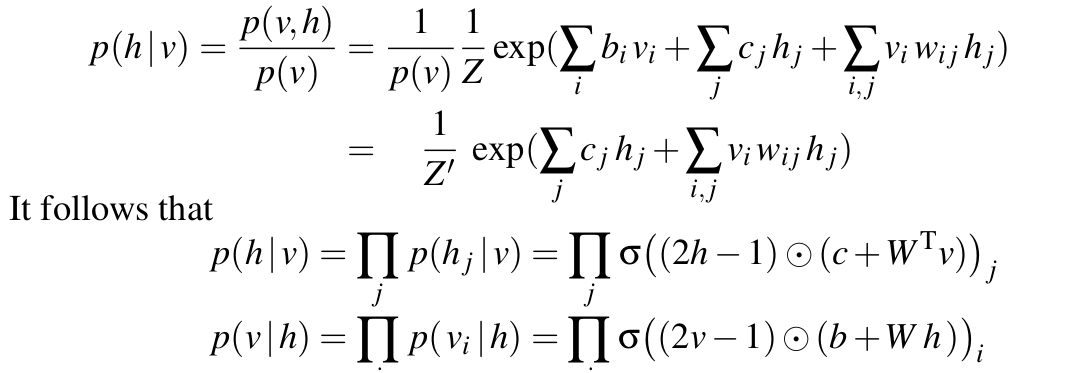


TODO: Apparently the flow is like: input -> hidden, then hidden -> input to generate a fantasy image. This fantasy image's log probability is minimised while the input image is maximised so that we generate something more like that in the future?

#### Alternate Gibbs Sampling: TODO: READ MORE
With the restricted Boltzmann Machine, we can sample from the Boltzmann probability distribution as follows:
1. Choose $v_0$ randomly &mdash; ie. pick a random image to be the initial state vector
2. Sample $h_0$ from $p(h | v_0)$
3. Sample $v_1$ from $p(v | h_0)$
4. Sample $h_1$ from $p(h | v_1)$
5. Alternating onwards, eventually the final generated image will be representative of the network's probability distribution 


<table>
    <tr>
        <td>            
            <img src="images/alternating-gibbs-sampling-1.png" width="100%">
        </td>
        <td>
            <img src="images/alternating-gibbs-sampling-2.png" width="100%">
        </td>
    <tr>
</table>



#### Contrastive Divergence: TODO: READ MORE

*Contrastive divergence* is used to train restricted Boltzmann machines.


1. Select a positive image sample $v^{(k)}$ from the training dataset
2. Generate a hidden layer vector $h^{(k)}$ by sampling it from $p(h | v^{(k)})$
3. Create 'fake' sample $\tilde{v}^{(k)}$ by alternating Gibbs sampling
4. For each fake sample $\tilde{v}^{(k)}$ we sample a hidden vector $\tilde{h}^{(k)}$ from $p(h | \tilde{v}^{(k)})$
5. Update network parameters: biases $b_i$ and $c_i$ and weight matrix $w_{ij}$ to increase $\log \big( p(v^{(k)}, h^{(k)}) \big) - \log \big( p(\tilde{v}^{(k)}, \tilde{h}^{(k)}) \big)$. We want to increase the probability of the real image $v^{(k)}$ and its corresponding hidden units $h^{(k)}$ while decreasing the probability of the fake image $\tilde{v}^{(k)}$ and its corresponding hidden units $\tilde{h}^{(k)}$ by running the update rules:

$$
    \begin{align}
        b_i &:= b_i + \eta \underbrace{(v_i - \tilde{v_i})}_{\text{Pixel differences}} \\
        c_j &:= c_j + \eta \underbrace{(h_j - \tilde{h_j})}_{\text{Hid differences}} \\
        w_{ij} &:= w_{ij} + \eta(v_i h_j - \tilde{v_i} \tilde{h_j})
    \end{align}
$$


#### Quick Contrastive Divergence: TODO: READ MORE

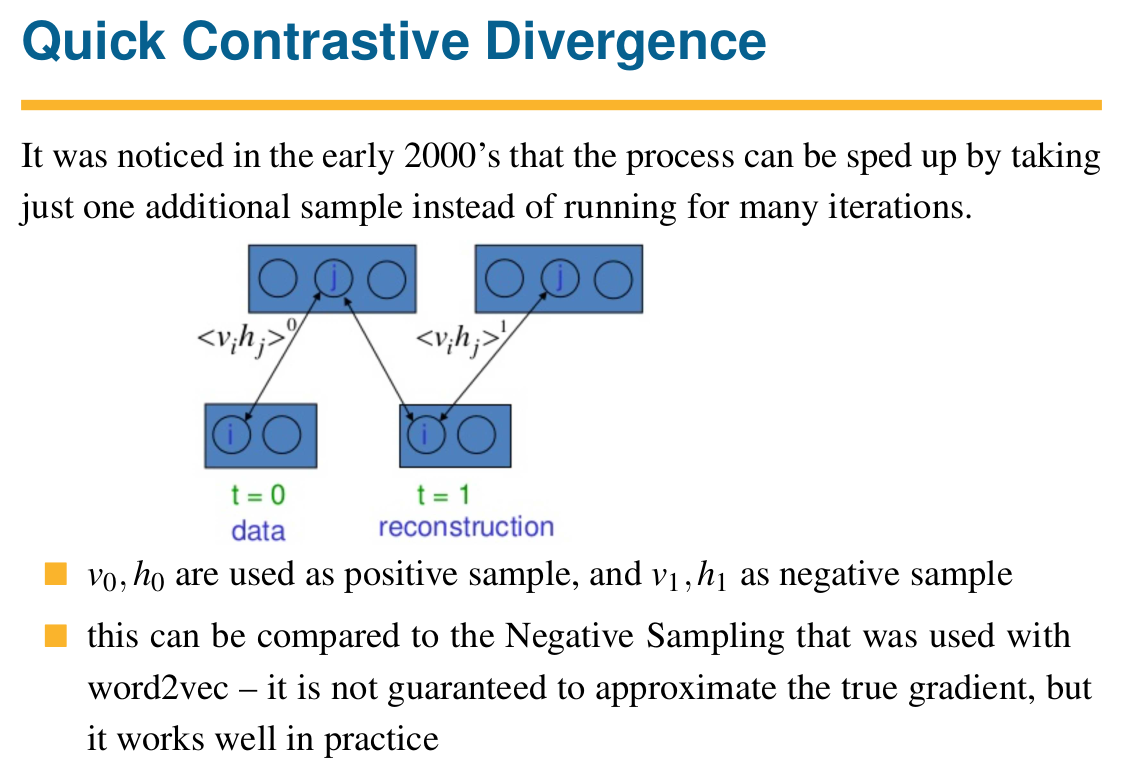


In essence, we train the network to increase the probability of a good sample of a "1" character for example, and decrease the probability of a bad sample of a "1" character, in the case of for when we're generating handwritten digits.

#### Deeper Boltzmann Machines:

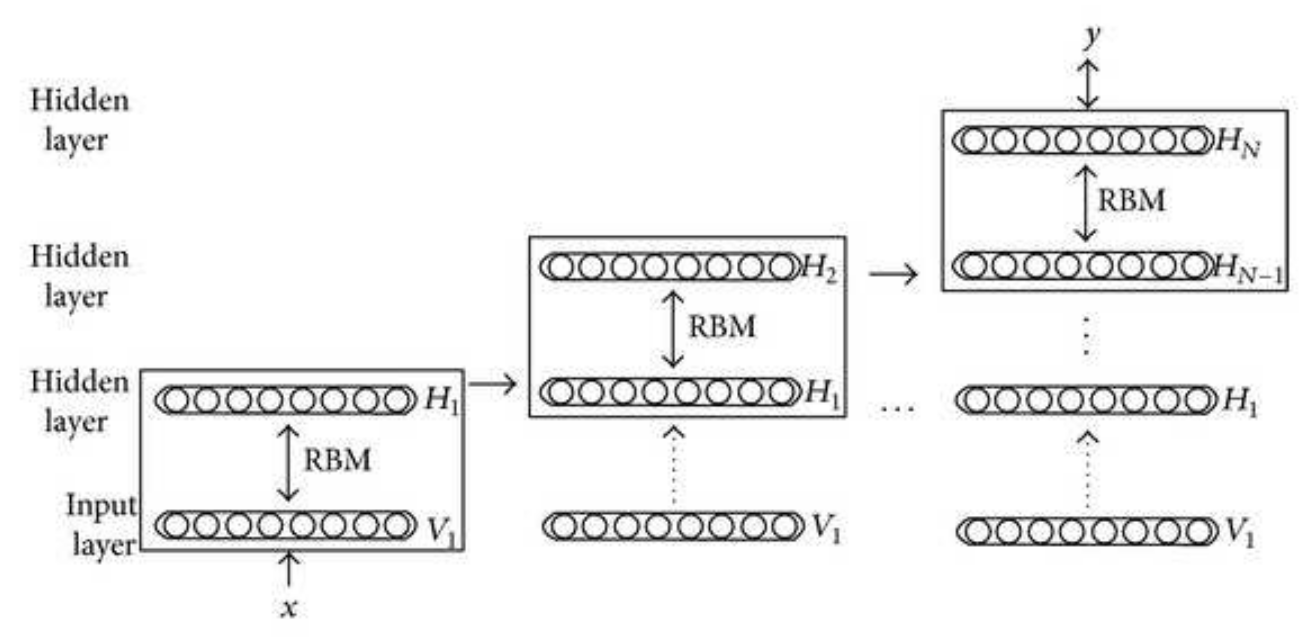

### Constraint Satisfaction Problems:

Suppose you have to place $n$ queens on an $n\times n$ board such that no two queens are attacking each other.

<table>
    <tr>
        <td>            
            <img src="images/chess-queen-constraint-satisfaction-problem.png" width="100%">
        </td>
        <td>
            <strong><p style="text-align: center;">Iterative improvement / Local search</p></strong>
            <img src="images/chess-queen-iterative-improvement.png" width="100%">
            <p style="text-align: center;">Solving the constraint satisfcation problem by local search involves randomly initialising the variables (eg. randomly distributing the queens), then varying one variable at a time, trying to reduce the number of violations at each step.</p>
        </td>
    <tr>
</table>



<table>
    <tr>
        <td>      
            <strong><p style="text-align: center;">Hill-Climbing by Min-Conflicts</p></strong>
            <img src="images/hill-climbing-constrain-satisfaction-chess.png" width="100%">
        </td>
        <td>
            <p style="text-align: center;">The hill-climbing by min-conflicts strategy involves selecting a random conflicted variable, then selecting a value that minimises the number of violated constraints</p>
        </td>
    <tr>
</table>




<table>
    <tr>
        <td>          
            <p style="text-align: center;">Hill-Climbing &mdash; maximising an objective function</p>
            <img src="images/hill-climbing.png" width="100%">
        </td>
        <td>
            <p style="text-align: center;">Hill-Climbing Inverted View &mdash; minimising a cost function</p>
            <img src="images/hill-climbing-inverted.png" width="100%">
        </td>
    <tr>
</table>


### Resources:
- <a href="https://medium.com/@serbanliviu/hopfield-nets-and-the-brain-e5880070cdba">Hopfield Networks and the Brain</a>
- <a href="https://towardsdatascience.com/hopfield-networks-are-useless-heres-why-you-should-learn-them-f0930ebeadcd">Hopfield networks are useless</a>
    - <a href="https://github.com/philipjk/genetic_algorithm_optimization_sklearn-based/blob/master/hopfield_networks.ipynb">Jupyter notebook for a Hopfield network</a>

